In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
clean_path = "/content/drive/MyDrive/Final Year Project/data/clean_online_retail.csv"

In [ ]:
df= pd.read_csv(clean_path,encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34


In [ ]:
# To remove POSTAGE value from Description Column 
df = df[df.Description != 'POSTAGE']

In [ ]:
print("Number of rows in dataset is: ", df.shape[0])
print("Number of columns in dataset is: ", df.shape[1])

Number of rows in dataset is:  396785
Number of columns in dataset is:  9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396785 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396785 non-null  int64  
 1   StockCode    396785 non-null  object 
 2   Description  396785 non-null  object 
 3   Quantity     396785 non-null  int64  
 4   InvoiceDate  396785 non-null  object 
 5   UnitPrice    396785 non-null  float64
 6   CustomerID   396785 non-null  int64  
 7   Country      396785 non-null  object 
 8   Sales        396785 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 30.3+ MB


In [ ]:
df['Description'] = df['Description'].astype(str)

In [ ]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year
df['WeekDay'] = df['InvoiceDate'].dt.day_name()
df['month_year'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))
df['hour'] = df['InvoiceDate'].dt.hour

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,month,year,WeekDay,month_year,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30,1,2010,Tuesday,2010-01-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1,2010,Tuesday,2010-01-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00,1,2010,Tuesday,2010-01-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1,2010,Tuesday,2010-01-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1,2010,Tuesday,2010-01-01,8


In [ ]:
plot1 = pd.DataFrame(df.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(df.groupby(['WeekDay'])['InvoiceNo'].count())
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()
plot3 = pd.DataFrame(df.groupby(['hour'])['InvoiceNo'].count()).reset_index()

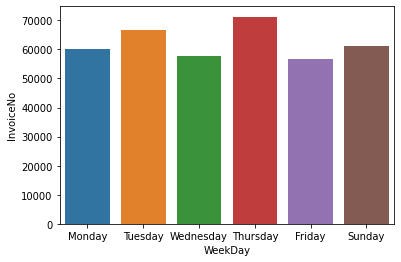

In [ ]:
import seaborn as sns
sns.barplot(x="WeekDay", y="InvoiceNo", data = plot2)

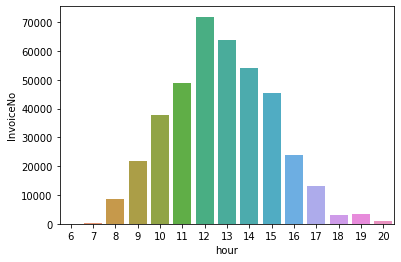

In [ ]:
sns.barplot(x="hour", y="InvoiceNo", data = plot3)

In [ ]:
#!pip install wordcloud

In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

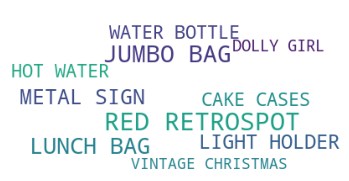

In [ ]:
text = ' '.join(df['Description'])
wordcloud2 = WordCloud(max_font_size=30, max_words=10, background_color="white").generate(text)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
def Word_Cloud(Country):
  print("Showing Word Cloud for all items purchased in Country : " + str(Country))
  print("-"*100)
  data = df.loc[df['Country'] == Country]
  text = ' '.join(data['Description'])
  wordcloud2 = WordCloud(max_font_size=30, max_words=150, background_color="white").generate(text)
  # Generate plot
  plt.imshow(wordcloud2)
  plt.axis("off")
  return plt.show()

Showing Word Cloud for all items purchased in Country : Germany
----------------------------------------------------------------------------------------------------


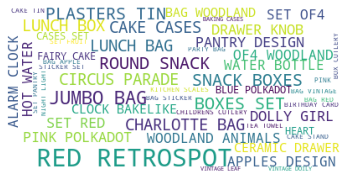

In [ ]:
#Example
Word_Cloud('Germany')

In [ ]:
top_10 = df['Country'].value_counts().head(10)
top_10 = pd.DataFrame({"Transaction_Counts":top_10})
top_10

,Transaction_Counts
United Kingdom,354294
Germany,8666
France,8041
EIRE,7236
Spain,2422
Netherlands,2322
Belgium,1935
Switzerland,1810
Portugal,1432
Australia,1181


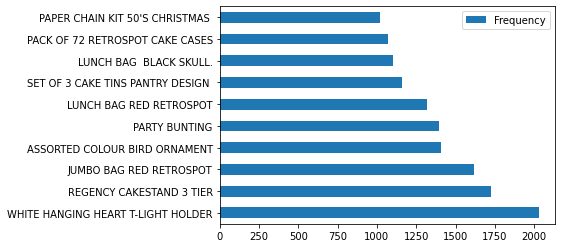

In [ ]:
top_10 = df['Description'].value_counts().head(10)
top_10 = pd.DataFrame({"Frequency":top_10})
top_10.plot.barh()

In [ ]:
top_10_names = ['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands','Belgium', 'Switzerland', 'Portugal', 'Australia']

In [ ]:
def Frequent_items(Country):
  data=df.loc[df['Country'] == Country]
  items = pd.DataFrame(data['Description'].value_counts().head(10)).rename(columns = {'Description': 'Item_frequency'})
  print("Total Transactions in " + Country + " are : ", data.shape[0])
  print("-"*100)
  print("\nHere are the Top 10 Frequent items according to transactions in " + Country)
  print("-"*100)
  print(items)
  print("-"*100)

In [ ]:
#Example
Frequent_items('Germany')

Total Transactions in Germany are :  8666
----------------------------------------------------------------------------------------------------

Here are the Top 10 Frequent items according to transactions in Germany
----------------------------------------------------------------------------------------------------
                                     Item_frequency
ROUND SNACK BOXES SET OF4 WOODLAND              113
ROUND SNACK BOXES SET OF 4 FRUITS                72
PLASTERS IN TIN WOODLAND ANIMALS                 64
REGENCY CAKESTAND 3 TIER                         63
WOODLAND CHARLOTTE BAG                           58
PLASTERS IN TIN CIRCUS PARADE                    53
PLASTERS IN TIN SPACEBOY                         49
6 RIBBONS RUSTIC CHARM                           47
SPACEBOY LUNCH BOX                               47
JUMBO BAG WOODLAND ANIMALS                       46
----------------------------------------------------------------------------------------------------


In [ ]:
def Bar_plot(Country):
  data=df.loc[df['Country'] == str(Country)]
  items = pd.DataFrame(data['Description'].value_counts().head(10)).rename(columns = {'Description': 'Item_frequency'})
  return items.plot.barh()

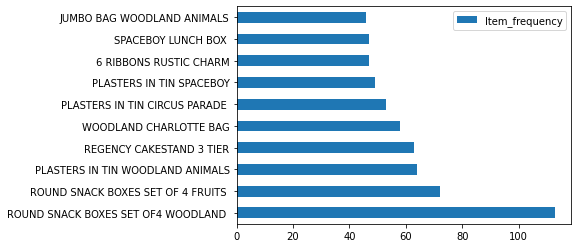

In [ ]:
#Example
Bar_plot('Germany')



Total Transactions in United Kingdom are :  354294
----------------------------------------------------------------------------------------------------

Here are the Top 10 Frequent items according to transactions in United Kingdom
----------------------------------------------------------------------------------------------------
                                    Item_frequency
WHITE HANGING HEART T-LIGHT HOLDER            1940
JUMBO BAG RED RETROSPOT                       1464
REGENCY CAKESTAND 3 TIER                      1426
ASSORTED COLOUR BIRD ORNAMENT                 1333
PARTY BUNTING                                 1307
LUNCH BAG RED RETROSPOT                       1147
LUNCH BAG  BLACK SKULL.                       1049
SET OF 3 CAKE TINS PANTRY DESIGN              1020
PAPER CHAIN KIT 50'S CHRISTMAS                 982
HEART OF WICKER SMALL                          952
----------------------------------------------------------------------------------------------------
Sho

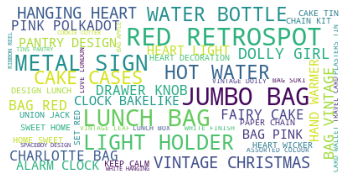

----------------------------------------------------------------------------------------------------


Total Transactions in Germany are :  8666
----------------------------------------------------------------------------------------------------

Here are the Top 10 Frequent items according to transactions in Germany
----------------------------------------------------------------------------------------------------
                                     Item_frequency
ROUND SNACK BOXES SET OF4 WOODLAND              113
ROUND SNACK BOXES SET OF 4 FRUITS                72
PLASTERS IN TIN WOODLAND ANIMALS                 64
REGENCY CAKESTAND 3 TIER                         63
WOODLAND CHARLOTTE BAG                           58
PLASTERS IN TIN CIRCUS PARADE                    53
PLASTERS IN TIN SPACEBOY                         49
6 RIBBONS RUSTIC CHARM                           47
SPACEBOY LUNCH BOX                               47
JUMBO BAG WOODLAND ANIMALS                       46
--------

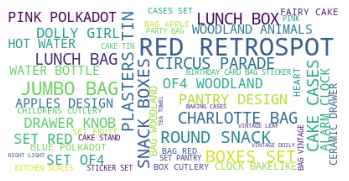

----------------------------------------------------------------------------------------------------


Total Transactions in France are :  8041
----------------------------------------------------------------------------------------------------

Here are the Top 10 Frequent items according to transactions in France
----------------------------------------------------------------------------------------------------
                                     Item_frequency
RABBIT NIGHT LIGHT                               73
RED TOADSTOOL LED NIGHT LIGHT                    70
PLASTERS IN TIN WOODLAND ANIMALS                 68
PLASTERS IN TIN CIRCUS PARADE                    66
ROUND SNACK BOXES SET OF4 WOODLAND               62
LUNCH BAG RED RETROSPOT                          60
LUNCH BOX WITH CUTLERY RETROSPOT                 56
SET/6 RED SPOTTY PAPER CUPS                      54
RED RETROSPOT MINI CASES                         54
PLASTERS IN TIN SPACEBOY                         53
----------

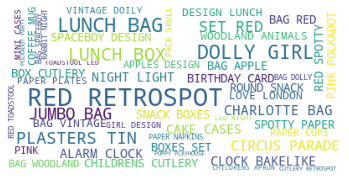

----------------------------------------------------------------------------------------------------


Total Transactions in EIRE are :  7236
----------------------------------------------------------------------------------------------------

Here are the Top 10 Frequent items according to transactions in EIRE
----------------------------------------------------------------------------------------------------
                                    Item_frequency
CARRIAGE                                        98
REGENCY CAKESTAND 3 TIER                        64
ROSES REGENCY TEACUP AND SAUCER                 44
WHITE HANGING HEART T-LIGHT HOLDER              40
VINTAGE SNAP CARDS                              38
SET OF 3 REGENCY CAKE TINS                      34
GREEN REGENCY TEACUP AND SAUCER                 34
JAM MAKING SET WITH JARS                        31
JAM MAKING SET PRINTED                          29
PACK OF 72 RETROSPOT CAKE CASES                 28
-------------------------

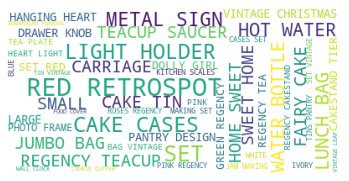

----------------------------------------------------------------------------------------------------


Total Transactions in Spain are :  2422
----------------------------------------------------------------------------------------------------

Here are the Top 10 Frequent items according to transactions in Spain
----------------------------------------------------------------------------------------------------
                                     Item_frequency
REGENCY CAKESTAND 3 TIER                         22
6 RIBBONS RUSTIC CHARM                           15
JAM MAKING SET WITH JARS                         13
SPACEBOY LUNCH BOX                               12
PLASTERS IN TIN SKULLS                           12
ROUND SNACK BOXES SET OF4 WOODLAND               12
ASSORTED COLOUR BIRD ORNAMENT                    12
ROSES REGENCY TEACUP AND SAUCER                  11
PACK OF 72 RETROSPOT CAKE CASES                  11
WHITE HANGING HEART T-LIGHT HOLDER               11
------------

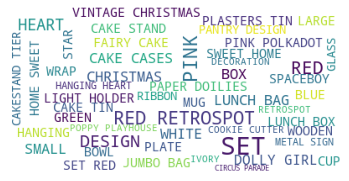

----------------------------------------------------------------------------------------------------


Total Transactions in Netherlands are :  2322
----------------------------------------------------------------------------------------------------

Here are the Top 10 Frequent items according to transactions in Netherlands
----------------------------------------------------------------------------------------------------
                                     Item_frequency
SPACEBOY LUNCH BOX                               28
ROUND SNACK BOXES SET OF4 WOODLAND               25
DOLLY GIRL LUNCH BOX                             22
SPACEBOY BIRTHDAY CARD                           17
ROUND SNACK BOXES SET OF 4 FRUITS                17
WOODLAND CHARLOTTE BAG                           16
RED TOADSTOOL LED NIGHT LIGHT                    14
STRAWBERRY LUNCH BOX WITH CUTLERY                14
JUMBO BAG RED RETROSPOT                          14
FAWN BLUE HOT WATER BOTTLE                       13


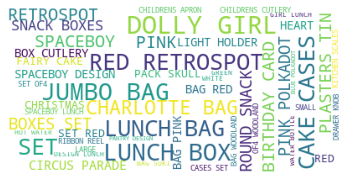

----------------------------------------------------------------------------------------------------


Total Transactions in Belgium are :  1935
----------------------------------------------------------------------------------------------------

Here are the Top 10 Frequent items according to transactions in Belgium
----------------------------------------------------------------------------------------------------
                                     Item_frequency
ROUND SNACK BOXES SET OF4 WOODLAND               38
DOLLY GIRL LUNCH BOX                             23
SPACEBOY LUNCH BOX                               23
ROUND SNACK BOXES SET OF 4 FRUITS                22
LUNCH BAG WOODLAND                               15
REGENCY CAKESTAND 3 TIER                         15
RED RETROSPOT CHARLOTTE BAG                      14
ALARM CLOCK BAKELIKE RED                         13
PLASTERS IN TIN SPACEBOY                         13
ALARM CLOCK BAKELIKE GREEN                       12
--------

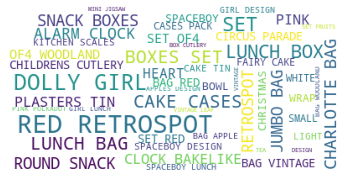

----------------------------------------------------------------------------------------------------


Total Transactions in Switzerland are :  1810
----------------------------------------------------------------------------------------------------

Here are the Top 10 Frequent items according to transactions in Switzerland
----------------------------------------------------------------------------------------------------
                                     Item_frequency
PLASTERS IN TIN SPACEBOY                         18
ROUND SNACK BOXES SET OF4 WOODLAND               17
PLASTERS IN TIN WOODLAND ANIMALS                 16
REGENCY CAKESTAND 3 TIER                         12
PLASTERS IN TIN CIRCUS PARADE                    11
RED RETROSPOT MINI CASES                         11
SPACEBOY BIRTHDAY CARD                           10
WOODLAND CHARLOTTE BAG                           10
ROUND SNACK BOXES SET OF 4 FRUITS                 9
SPOTTY BUNTING                                    9


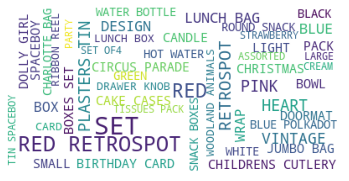

----------------------------------------------------------------------------------------------------


Total Transactions in Portugal are :  1432
----------------------------------------------------------------------------------------------------

Here are the Top 10 Frequent items according to transactions in Portugal
----------------------------------------------------------------------------------------------------
                                     Item_frequency
RETROSPOT TEA SET CERAMIC 11 PC                  14
LUNCH BAG RED RETROSPOT                          14
BAKING SET 9 PIECE RETROSPOT                     12
LUNCH BAG CARS BLUE                              12
JUMBO SHOPPER VINTAGE RED PAISLEY                11
CHARLOTTE BAG SUKI DESIGN                        10
RED RETROSPOT CHARLOTTE BAG                      10
JUMBO BAG PINK VINTAGE PAISLEY                    9
RED SPOTTY BISCUIT TIN                            9
JUMBO BAG SCANDINAVIAN BLUE PAISLEY               9
------

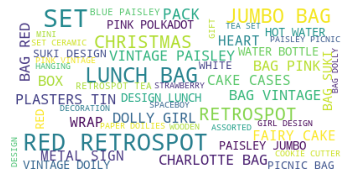

----------------------------------------------------------------------------------------------------


Total Transactions in Australia are :  1181
----------------------------------------------------------------------------------------------------

Here are the Top 10 Frequent items according to transactions in Australia
----------------------------------------------------------------------------------------------------
                                   Item_frequency
SET OF 3 CAKE TINS PANTRY DESIGN                9
RED TOADSTOOL LED NIGHT LIGHT                   9
BAKING SET SPACEBOY DESIGN                      8
ROSES REGENCY TEACUP AND SAUCER                 8
LUNCH BAG RED RETROSPOT                         8
LUNCH BAG SPACEBOY DESIGN                       8
PARTY BUNTING                                   8
HANGING HEART JAR T-LIGHT HOLDER                7
PAPER BUNTING RETROSPOT                         7
BAKING SET 9 PIECE RETROSPOT                    7
--------------------------

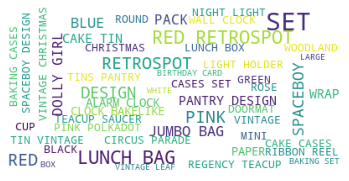

----------------------------------------------------------------------------------------------------


In [ ]:
for i in top_10_names:
  print("\n")
  Frequent_items(i)
  Word_Cloud(i)
  print("-"*100)
  

In [ ]:
top_10

,Frequency
WHITE HANGING HEART T-LIGHT HOLDER,2028
REGENCY CAKESTAND 3 TIER,1723
JUMBO BAG RED RETROSPOT,1618
ASSORTED COLOUR BIRD ORNAMENT,1408
PARTY BUNTING,1396
LUNCH BAG RED RETROSPOT,1316
SET OF 3 CAKE TINS PANTRY DESIGN,1159
LUNCH BAG BLACK SKULL.,1105
PACK OF 72 RETROSPOT CAKE CASES,1068
PAPER CHAIN KIT 50'S CHRISTMAS,1019


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,month,year,WeekDay,month_year,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30,1,2010,Tuesday,2010-01-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1,2010,Tuesday,2010-01-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00,1,2010,Tuesday,2010-01-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1,2010,Tuesday,2010-01-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1,2010,Tuesday,2010-01-01,8


In [ ]:
#converting all positive vaues to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
def Get_Frequent_Patterns():
  # Encoding data
  DF = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
  DF_sets = DF.applymap(my_encode_units)
  # Building the model
  frequent_itemsets = apriori(DF_sets, min_support=0.01, use_colnames=True)
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
  
  # Adding New Metrics Columns in rules 
  rules = rules.assign(Conf_B_A = lambda x : rules['support']/rules['consequent support'])
  rules = rules.assign(Cosine_A_B = lambda x : np.sqrt(rules['confidence']*rules['Conf_B_A']))
  rules = rules.assign(Kulczynski_A_B = lambda x : (1/2)*(rules['confidence']+rules['Conf_B_A']))
  rules = rules.assign(all_conf_A_B = lambda x : rules['support']/(np.maximum(rules['antecedent support'],rules['consequent support'])))
  rules = rules.assign(Zhangs_A_B = lambda x : (rules['support'] - (rules['antecedent support']*rules['consequent support']))/np.maximum((rules['support']*(1-rules['consequent support'])),rules['consequent support']*(rules['consequent support']-rules['antecedent support'])))

  # Filtering rules
  top_rules=rules[(rules['confidence'] > 0.7) & (rules['lift'] > 10)].sort_values(by='support', ascending=False).head(5)

  return top_rules



In [ ]:
Get_Frequent_Patterns()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Conf_B_A,Cosine_A_B,Kulczynski_A_B,all_conf_A_B,Zhangs_A_B
45,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037392,0.042370,0.029275,0.782923,18.478190,0.027691,4.411482,0.690932,0.735491,0.736928,0.690932,0.987732
40,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.034361,0.040909,0.025054,0.729134,17.823272,0.023648,3.540830,0.612434,0.668241,0.670784,0.612434,0.984154
43,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030087,0.037392,0.024892,0.827338,22.126206,0.023767,5.575106,0.665702,0.742132,0.746520,0.665702,0.991893
84,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030087,0.042370,0.023593,0.784173,18.507677,0.022318,4.437018,0.556833,0.660797,0.670503,0.556833,0.987823
148,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024892,0.042370,0.021104,0.847826,20.009995,0.020049,6.292996,0.498084,0.649838,0.672955,0.498084,0.992059
